- By [lazarusA](https://lazarusa.github.io/Webpage/index.html)

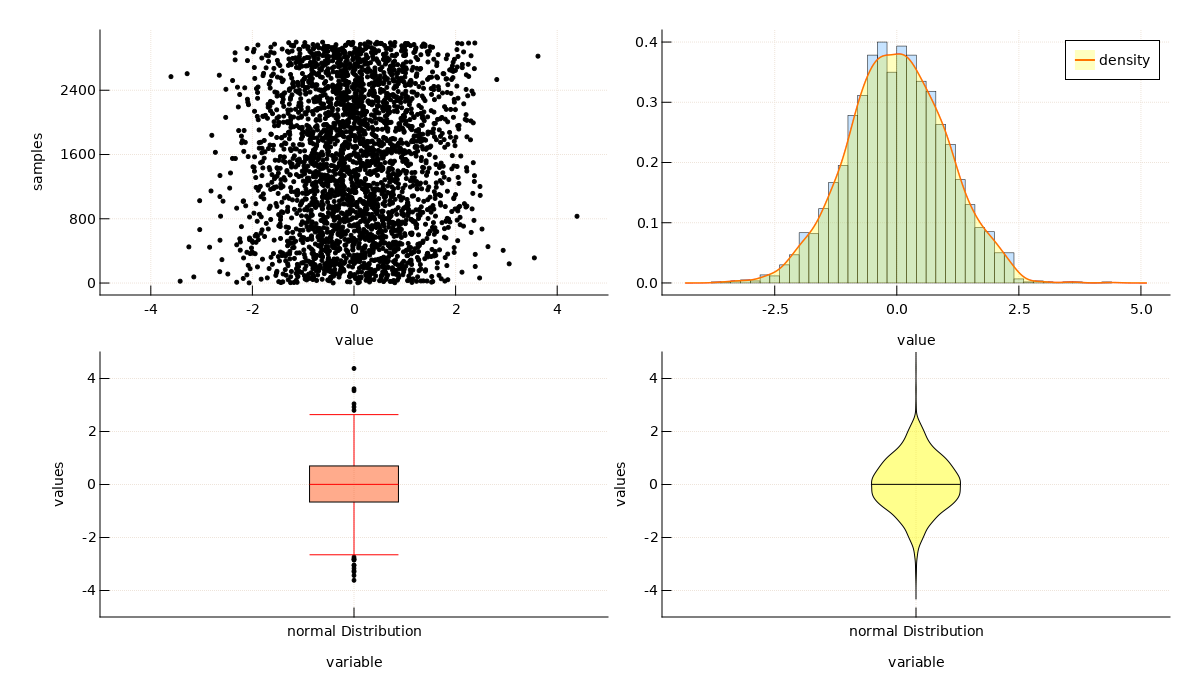

In [2]:
using StatsBase, KernelDensity, Colors, LinearAlgebra
using Random
using CairoMakie, ColorSchemes
include("makieTheme6.jl")

Random.seed!(13)
b = randn(3000)
a = fill(1, length(b))

fig = Figure(resolution = (1200, 700), font = "sans")
ax1 = Axis(fig, xlabel = "value", ylabel = "samples" )
ax2 = Axis(fig, xlabel = "value", ylabel = "" )
ax3 = Axis(fig, xlabel = "variable", ylabel = "values", 
    xticks = ([1],["normal Distribution"]))
ax4 = Axis(fig, xlabel = "variable", ylabel = "values", 
    xticks = ([1],["normal Distribution"]) )

#scatter plot
scatter!(ax1, b, 1:length(b), markersize = 4, color = :black)
xlims!(ax1,-5,5)
#histogram, density plot
h = fit(Histogram, b, nbins = 50)
h = normalize(h)
# normalized histogram
plot!(ax2, h, color = (:dodgerblue, 0.25), strokecolor = :black, strokewidth = 0.5)
# density distribution
d = kde(b)
linec = lines!(ax2, d.x, d.density, color = :orangered, linewidth = 1.5)
bandc = band!(ax2, d.x, 0*d.density, d.density, color = (:yellow, 0.25))
leg = Legend(fig, [[linec, bandc]], ["density"], framevisible = true,
    tellheight = false, tellwidth = false, halign = :right, valign = :top)
#box plot
boxplot!(ax3, a, b; whiskerwidth = 1, width = 0.35,  color = (:orangered, 0.45), 
            whiskercolor = (:red, 1), mediancolor = :red, markersize = 5,
            strokecolor = :black, strokewidth = 1)
limits!(ax3, 0,2,-5,5)
#violin plot
violin!(ax4, a, b; width = 0.35,  color = (:yellow, 0.45), 
    strokecolor =:black, show_median = true, mediancolor = :black)
limits!(ax4, 0,2,-5,5)

fig[1,1] = ax1
fig[1,2] = ax2
fig[1,2] = leg
fig[2,1] = ax3
fig[2,2] = ax4
save("./results/FigStats.png", fig, px_per_unit = 2)
fig